# Perceptron Model

* The Perceptron is a linear classifier that predicts based on a weighted sum of
input features. 
* It updates weights using the formula: 𝑤𝑖 = 𝑤𝑖 + η⋅(𝑦 − 𝑦^)⋅𝑥𝑖

* where 𝑤i is the weight, η is the learning rate, y is the true label, 𝑦^ is the predicted and 𝑥i is the input feature



## Part A: Implementation of the Perceptron Model

### import tools

In [516]:
import numpy as np
import pandas as pd

### load dataset: 
   * dataset details at https://archive.ics.uci.edu/ml/datasets/iris

<div style="text-align: center;">
<img src="./images/Iris dataset.png" alt="IrisData" width="700">

In [517]:
# load dataset

df = pd.read_csv('data/iris.csv')

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Convert non-numeric data, for numpy processing

In [518]:
targets = set(df['variety'].to_list())

targets

{'Setosa', 'Versicolor', 'Virginica'}

#### Remove Virginica

In [519]:
virginica_indices = df[df['variety'] == 'Setosa'].index
df = df.drop(virginica_indices);

targets = set(df['variety'].to_list())
print(targets)
idx = {}

for i, target in enumerate(targets):
    idx[target] = i

idx

{'Versicolor', 'Virginica'}


{'Versicolor': 0, 'Virginica': 1}

In [520]:
df['variety'] = [idx[x] for x in df['variety']]

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


### Remove Petal and Sepal width columns

In [521]:
df = df.drop('sepal.width', axis=1)
df = df.drop('petal.width', axis=1)
df.head()

,sepal.length,petal.length,variety
50,7.0,4.7,0
51,6.4,4.5,0
52,6.9,4.9,0
53,5.5,4.0,0
54,6.5,4.6,0


### Define Perceptron Classifier

### Define Model

In [522]:
import time

class Perceptron():
    def __init__(self, learning_rate=0.01, epochs=100, random_state=42):
        ''' constructor '''
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.errors= []
        self.accuracy= []
        self.training_time = None


In [523]:
def fit(self, X, y):
    ''' function to train the tree '''
    tic = time.time()
    samples_n, features_n = X.shape
    # Initialize weights and bias
    self.weights = np.zeros(features_n)
    self.bias = 0

    for epoch in range(self.epochs):
        errors = 0
        for xi, target in zip(X, y):
            z = np.dot(xi, self.weights) + self.bias
            y_hat = 1 if z >= 0 else 0
            alpha = self.learning_rate * (target - y_hat)
            # Update weights and bias
            self.weights += alpha * xi
            self.bias += alpha

            if target != y_hat: 
                errors += 1

        #Update stats
        accuracy = (len(X) - errors) / len(X)
        self.errors.append(errors)
        self.accuracy.append(accuracy)
    toc = time.time()
    self.training_time = 1000*(toc-tic)
    return self

Perceptron.fit = fit

In [524]:
def predict(self, X):
    ''' function to predict new dataset '''
    linear_output = np.dot(X, self.weights) + self.bias
    preditions = np.where(linear_output >= 0, 1, 0)
    return preditions

Perceptron.predict = predict

In [525]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def plot_decision_boundary(self, X_train, X_test, y_train, y_test):
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)  # Filled contours for decision regions
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Training Data', edgecolors='k')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Test Data', marker='X', edgecolors='k')

    plt.xlabel('Sepal Length (Standardized)')
    plt.ylabel('Petal Length (Standardized)')
    plt.title('Perceptron Decision Boundary')
    
    plt.legend()
    plt.show()

Perceptron.plot = plot_decision_boundary

In [526]:
def print_stats(self, X_test, y_test, X_train, y_train):
    Y_pred_test = self.predict(X_test) 
    Y_pred_train = self.predict(X_train) 
    print("-----------------------------------------------")
    print("Learning rate is = "+str(self.learning_rate))
    print("Epochs is = "+str(self.epochs))
    print("Training Accuracy = ", accuracy_score(y_train, Y_pred_train)*100)
    print("Test Accuracy = ", accuracy_score(y_test, Y_pred_test)*100)
    print("Weights (W1, W2): "+str(self.weights)+", Bias (B): "+str(self.bias)+", training time ="+ str(self.training_time) +"ms")
    print("-----------------------------------------------")
    print()

Perceptron.print = print_stats

### Split the data in train and test set for fitting and evaluation

In [527]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [528]:
classifier = Perceptron(epochs=500)
classifier.fit(X_train,y_train)
print("Weights (W1, W2): "+str(classifier.weights)+" training time ="+ str(classifier.training_time))
print("Bias (B): "+str(classifier.bias))

Weights (W1, W2): [-0.754  1.453] training time =330.3706645965576
Bias (B): [-2.34]


In [529]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron as SkPerceptron 


y_pred_test = classifier.predict(X_test) 
y_pred_train = classifier.predict(X_train) 

print("Test Accuracy = ", accuracy_score(y_test, y_pred_test)*100)
print("Train Accuracy= ", accuracy_score(y_train, y_pred_train)*100)


# Built-in Model, fit and accuracy
sklearn_perceptron = SkPerceptron(eta0=0.1, max_iter=500, random_state=42) 
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#print("1D Vector Shape:", X_train_std.shape)
#y_train = y_train.reshape(1, -1) 
y_train2 = y_train.ravel()
#print("1D Vector Shape:", y_train.shape)

sklearn_perceptron.fit(X_train_std, y_train2)
ypred = sklearn_perceptron.predict(X_test_std)

#sklearn_perceptron.fit(X_train2, y_train)
#y_pred_sklearn = sklearn_perceptron.predict(X_test2)
print("Sklearn Accuracy = ", accuracy_score(Y_test, ypred)*100)



Test Accuracy =  95.0
Train Accuracy=  93.75
Sklearn Accuracy =  90.0


### Visualise 

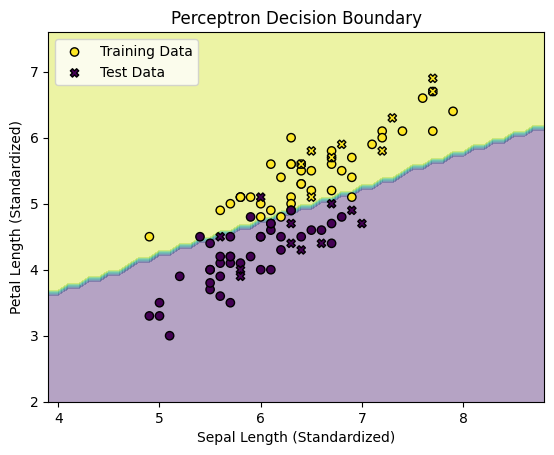

In [530]:
classifier.plot(X_train, X_test, Y_train, y_test)

## Plot Accuracy

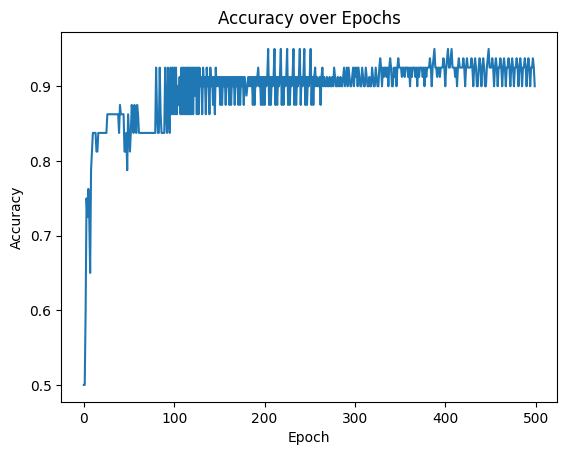

In [531]:
plt.plot(classifier.accuracy)
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Bonus Challenge

-----------------------------------------------
Learning rate is = 0.01
Epochs is = 100
Training Accuracy =  86.25
Test Accuracy =  90.0
Weights (W1, W2): [-0.783  1.15 ], Bias (B): [-0.99], training time =45.240163803100586ms
-----------------------------------------------

-----------------------------------------------
Learning rate is = 0.05
Epochs is = 100
Training Accuracy =  86.25
Test Accuracy =  90.0
Weights (W1, W2): [-3.895  5.71 ], Bias (B): [-4.9], training time =55.88698387145996ms
-----------------------------------------------

-----------------------------------------------
Learning rate is = 0.001
Epochs is = 100
Training Accuracy =  86.25
Test Accuracy =  90.0
Weights (W1, W2): [-0.0783  0.115 ], Bias (B): [-0.099], training time =52.233219146728516ms
-----------------------------------------------

-----------------------------------------------
Learning rate is = 0.005
Epochs is = 100
Training Accuracy =  86.25
Test Accuracy =  90.0
Weights (W1, W2): [-0.3915  0.57

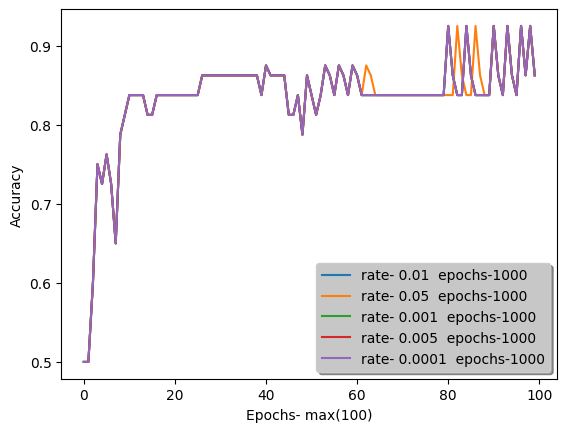

In [532]:
learning_rates = [0.01, 0.05, 0.001, 0.005, 0.0001]
epochs = [ 100, 500, 1000]
for lr in learning_rates:
    model = Perceptron(learning_rate=lr, epochs=100)
    model.fit(X_train,y_train)
    model.print(X_test, y_test, X_train, y_train)
    plt.plot(np.squeeze(model.accuracy), label= 'rate- '+str(lr) +'  epochs-'+ str(ep))

plt.ylabel('Accuracy')
plt.xlabel('Epochs- max(100)')

legend = plt.legend(loc='lower right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.78')
plt.show()

### Epochs - 500

-----------------------------------------------
Learning rate is = 0.01
Epochs is = 500
Training Accuracy =  93.75
Test Accuracy =  95.0
Weights (W1, W2): [-0.754  1.453], Bias (B): [-2.34], training time =260.1609230041504ms
-----------------------------------------------

-----------------------------------------------
Learning rate is = 0.05
Epochs is = 500
Training Accuracy =  91.25
Test Accuracy =  85.0
Weights (W1, W2): [-3.645  7.345], Bias (B): [-11.65], training time =221.74072265625ms
-----------------------------------------------

-----------------------------------------------
Learning rate is = 0.001
Epochs is = 500
Training Accuracy =  93.75
Test Accuracy =  95.0
Weights (W1, W2): [-0.0754  0.1453], Bias (B): [-0.234], training time =237.24794387817383ms
-----------------------------------------------

-----------------------------------------------
Learning rate is = 0.005
Epochs is = 500
Training Accuracy =  93.75
Test Accuracy =  95.0
Weights (W1, W2): [-0.377   0.726

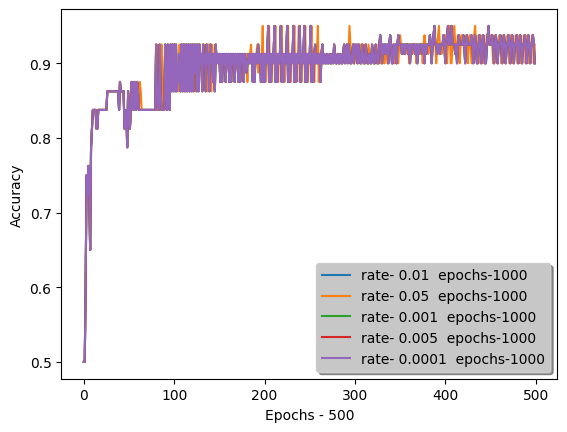

In [533]:
for lr in learning_rates:
    model = Perceptron(learning_rate=lr, epochs=500)
    model.fit(X_train,y_train)
    model.print(X_test, y_test, X_train, y_train)
    plt.plot(np.squeeze(model.accuracy), label= 'rate- '+str(lr) +'  epochs-'+ str(ep))

plt.ylabel('Accuracy')
plt.xlabel('Epochs - 500')

legend = plt.legend(loc='lower right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.78')
plt.show()

Epochs - 1000

-----------------------------------------------
Learning rate is = 0.01
Epochs is = 750
Training Accuracy =  91.25
Test Accuracy =  90.0
Weights (W1, W2): [-0.737  1.489], Bias (B): [-2.85], training time =346.6460704803467ms
-----------------------------------------------

-----------------------------------------------
Learning rate is = 0.05
Epochs is = 750
Training Accuracy =  93.75
Test Accuracy =  95.0
Weights (W1, W2): [-3.59  7.59], Bias (B): [-14.2], training time =318.61114501953125ms
-----------------------------------------------

-----------------------------------------------
Learning rate is = 0.001
Epochs is = 750
Training Accuracy =  91.25
Test Accuracy =  90.0
Weights (W1, W2): [-0.0737  0.1489], Bias (B): [-0.285], training time =326.8098831176758ms
-----------------------------------------------

-----------------------------------------------
Learning rate is = 0.005
Epochs is = 750
Training Accuracy =  91.25
Test Accuracy =  90.0
Weights (W1, W2): [-0.3685  0.7445

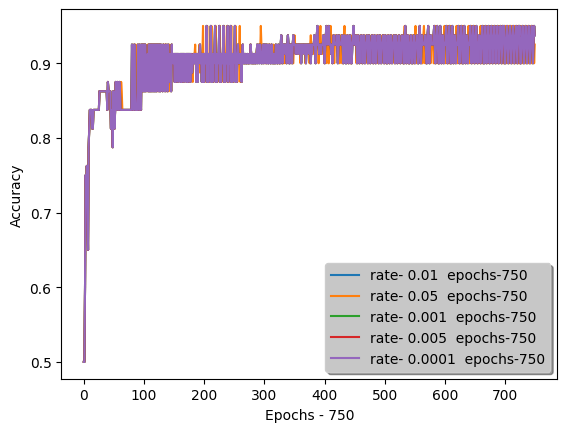

In [534]:

for lr in learning_rates:
    model = Perceptron(learning_rate=lr, epochs=750)
    model.fit(X_train,y_train)
    model.print(X_test, y_test, X_train, y_train)
    plt.plot(np.squeeze(model.accuracy), label= 'rate- '+str(lr) +'  epochs-'+ str(750))

plt.ylabel('Accuracy')
plt.xlabel('Epochs - 750')

legend = plt.legend(loc='lower right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.78')
plt.show()